# EC1B1 Macroeconomics Coursework - Code

This notebook contains all the code for our EC1B1 Macroeconomics coursework. The code is divided into the following sections:

## 0. Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load and Preprocess Data

We first load the Italy and USA data into separate dataframes.

In [41]:
italy_df = pd.read_excel('data/IMF_Italy.xlsx', header=1, index_col=0)
usa_df = pd.read_excel('data/IMF_US.xlsx', header=1, index_col=0)

### 1.1 Inspect Data

In [42]:
italy_df.head()

,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
Jan 1960,31.134278,621.118012,2989.5,4.143942
Feb 1960,32.602650,621.118012,2958.5,4.136754
Mar 1960,33.712883,620.600000,2923.5,4.129566
Apr 1960,33.891953,625.000001,2959.5,4.125971
May 1960,34.632109,625.000001,2970.5,4.133160


In [43]:
usa_df.head()

,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
Jan 1960,21478.1,13.436946
Feb 1960,21395.7,13.482806
Mar 1960,21344.7,13.482806
Apr 1960,21278.0,13.528666
May 1960,21234.3,13.528666


We will shorten the column names for easier inspection and reference:

In [44]:
italy_df.columns = ['industrial_production_index', 'nominal_er_nat_currency_per_usd', 'reserves_in_usd', 'cpi']
usa_df.columns = ['reserves_in_usd', 'cpi']

In [45]:
italy_df.head()

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd,cpi
Jan 1960,31.134278,621.118012,2989.5,4.143942
Feb 1960,32.602650,621.118012,2958.5,4.136754
Mar 1960,33.712883,620.600000,2923.5,4.129566
Apr 1960,33.891953,625.000001,2959.5,4.125971
May 1960,34.632109,625.000001,2970.5,4.133160


In [46]:
usa_df.head()

,reserves_in_usd,cpi
Jan 1960,21478.1,13.436946
Feb 1960,21395.7,13.482806
Mar 1960,21344.7,13.482806
Apr 1960,21278.0,13.528666
May 1960,21234.3,13.528666


### 1.2 Merge Data

In [47]:
df = pd.merge(italy_df, usa_df, left_index=True, right_index=True, suffixes=('_italy', '_usa'))
df.head()

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd_italy,cpi_italy,reserves_in_usd_usa,cpi_usa
Jan 1960,31.134278,621.118012,2989.5,4.143942,21478.1,13.436946
Feb 1960,32.602650,621.118012,2958.5,4.136754,21395.7,13.482806
Mar 1960,33.712883,620.600000,2923.5,4.129566,21344.7,13.482806
Apr 1960,33.891953,625.000001,2959.5,4.125971,21278.0,13.528666
May 1960,34.632109,625.000001,2970.5,4.133160,21234.3,13.528666


## 2. Identify Outliers

To identify outliers, we will use the IQR method. This involves establishing an upper and lower "fence" equal to 1.5 times the IQR above the third quartile and below the first quartile, respectively. Any data points that fall outside these fences should be considered outliers.

Fortunately, Matplotlib's boxplot function automatically visualises the presence of outliers in the indicators. We will create a boxplot for each indicator as a cursory inspection.

$$ \text{Lower Fence} = Q1 - 1.5 \times IQR $$
$$ \text{Upper Fence} = Q3 + 1.5 \times IQR $$

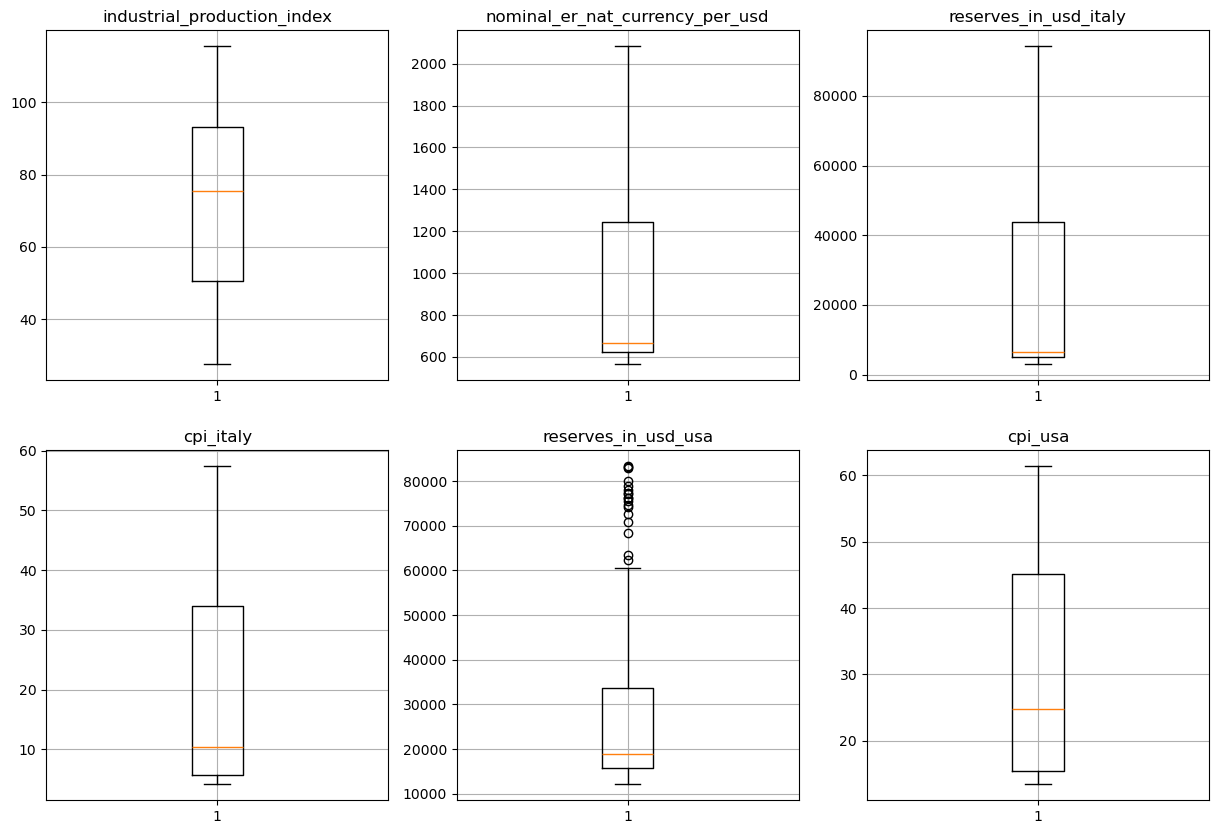

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.columns, axes)):
    ax.boxplot(df[col], showfliers=True)
    ax.set_title(col)
    ax.grid(True)
plt.show()

As seen above, there seems to be a few outliers in the reserve value data for the USA and none anywhere else.

### 2.1 Create fences for downloaded indicators

$$ \text{Lower Fence} = Q1 - 1.5 \times IQR $$
$$ \text{Upper Fence} = Q3 + 1.5 \times IQR $$

In [49]:
fences = {}
for column in df.columns:
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_fence = df[column].quantile(0.25) - 1.5 * iqr
    upper_fence = df[column].quantile(0.75) + 1.5 * iqr
    fences[column] = (lower_fence, upper_fence)

fences

{'industrial_production_index': (-13.510820006722973, 157.13080683321542),
 'nominal_er_nat_currency_per_usd': (-303.5037484375001, 2172.5062490625),
 'reserves_in_usd_italy': (-53640.7712438552, 102466.26074725347),
 'cpi_italy': (-36.96411504076126, 76.65163730045546),
 'reserves_in_usd_usa': (-11144.341994445569, 60571.50332407595),
 'cpi_usa': (-29.01210930244827, 89.53569160145011)}

### 2.2 Count Outliers

In [50]:
df.head()

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd_italy,cpi_italy,reserves_in_usd_usa,cpi_usa
Jan 1960,31.134278,621.118012,2989.5,4.143942,21478.1,13.436946
Feb 1960,32.602650,621.118012,2958.5,4.136754,21395.7,13.482806
Mar 1960,33.712883,620.600000,2923.5,4.129566,21344.7,13.482806
Apr 1960,33.891953,625.000001,2959.5,4.125971,21278.0,13.528666
May 1960,34.632109,625.000001,2970.5,4.133160,21234.3,13.528666


In [51]:
print("Number of outliers:")
for column in df.columns:
    outlier_bool_array = (df[column] < fences[column][0]) | (df[column] > fences[column][1]) # boolean array checking if the value is outside the lower or upper fences
    print(column, '--', outlier_bool_array.sum()) # sum() counts the number of True values in the boolean array

Number of outliers:
industrial_production_index -- 0
nominal_er_nat_currency_per_usd -- 0
reserves_in_usd_italy -- 0
cpi_italy -- 0
reserves_in_usd_usa -- 18
cpi_usa -- 0


At first glance, there are 18 supposed outliers in US reserve value data! Closer inspection is required to determine whether these outliers should be removed, or whether they are valid data points representing significant events.

We will print the rows with outlier values.

In [52]:
df[(df['reserves_in_usd_usa'] < fences['reserves_in_usd_usa'][0]) | (df['reserves_in_usd_usa'] > fences['reserves_in_usd_usa'][1])]

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd_italy,cpi_italy,reserves_in_usd_usa,cpi_usa
Jul 1989,109.244545,1371.00,66068.137119,52.505319,63462.210506,57.049696
Aug 1989,50.939403,1383.52,68448.797116,52.632454,62363.845992,57.141416
Sep 1989,113.780981,1405.30,72466.001011,52.886714,68417.495745,57.324855
Oct 1989,113.076640,1369.23,72381.127961,53.310487,70808.689361,57.600015
Nov 1989,115.297106,1343.54,69992.121702,53.607125,72559.751651,57.737594
Dec 1989,106.582373,1293.59,73215.703682,53.819016,74608.633269,57.829314
Jan 1990,102.786093,1262.49,72854.222487,54.327535,75506.361462,58.425493
Feb 1990,103.430808,1244.01,72632.169921,54.751309,74173.524868,58.700652
Mar 1990,114.390974,1257.29,77994.863959,54.963200,76303.028540,59.021671
Apr 1990,99.746719,1239.94,79600.735077,55.175082,76283.210610,59.113391


Upon closer inspection, these "outliers" correspond to the last 18 months of USA international reserve data. Hence, these datapoints represent a large rise in the reserve value, rather than an error in the data. They should be kept in the dataset.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

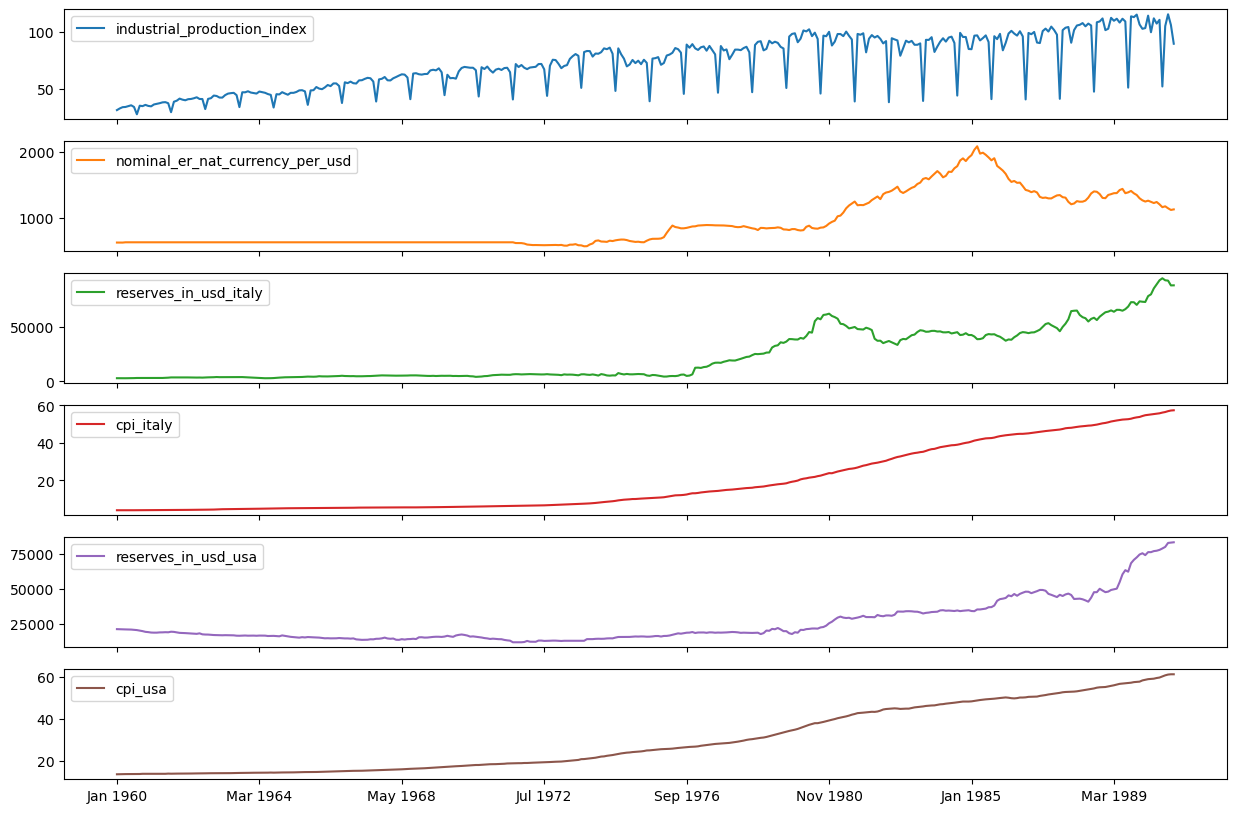

In [53]:
df.plot(subplots=True, figsize=(15, 10))

We notice that the industrial production index experiences a significant drop in a cyclical fashion, from the plot above. On closer inspection, we note that this drop always takes place during August. This could perhaps be explained by seasonality, with August being the end of summer which could have affected industrial production significantly in the past. Since this drop happens predictably, we will not consider it as an outlier.

## 3. Construct Variables

We will now construct the following variables as per the coursework instructions:

1. The monthly growth in the nominal exchange rate
2. The real exchange rate
3. The monthly growth in the real exchange rate
4. The monthly inflation rate
5. The monthly growth in industrial production
6. The growth in industrial production versus 12 months ago (i.e. January 1971 versus January 1970 etc.)
7. An index of the value of international reserves (value of reserves at January 1960 = 100)

These will go into a separate dataframe.

### 3.1 Monthly Nominal Exchange Rate Growth

The monthly growth in the nominal exchange rate is calculated as the percentage change in the nominal exchange rate from the previous month.

$$ \text{Monthly NER Growth} = \frac{ER_t - ER_{t-1}}{ER_{t-1}} \times 100 $$

We can use the `pct_change()` method in `pandas` to calculate this.

In [54]:
variables_df = pd.DataFrame()
variables_df['nominal_er_growth_rate'] = df['nominal_er_nat_currency_per_usd'].pct_change() * 100

### 3.2 Real Exchange Rate

We note that the nominal exchange rate is calculated as the number of Italian Lira per 1 US Dollar.

The real exchange rate is calculated as the nominal exchange rate multiplied by the ratio of the price index in Italy to the price index in the USA.

$$ ER^{L/\$}_{real} = ER^{L/\$}_{nominal} \times \frac{P_{US}}{P_{Italy}} $$

In [55]:
variables_df['real_er_nat_currency_per_usd'] = df['nominal_er_nat_currency_per_usd'] * df['cpi_usa'] / df['cpi_italy']

### 3.3 Monthly Real Exchange Rate Growth

We can use the same method as in 3.1 to calculate the monthly growth in the real exchange rate.

In [56]:
variables_df['real_er_growth_rate'] = variables_df['real_er_nat_currency_per_usd'].pct_change() * 100

### 3.4 Monthly Inflation Rate (Italy and USA)

$$ \pi = \frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}  $$

In [57]:
variables_df['inflation_rate_italy'] = df['cpi_italy'].pct_change() * 100
variables_df['inflation_rate_usa'] = df['cpi_usa'].pct_change() * 100

### 3.5 Monthly Growth in Industrial Production

In [58]:
variables_df['industrial_production_1m_growth_rate'] = df['industrial_production_index'].pct_change() * 100

### 3.6 Growth in Industrial Production versus 12 months ago

To measure the growth in industrial production versus 12 months ago, we can override the `periods` parameter (which has a default of 1) in the `pct_change()` method.

In [59]:
variables_df['industrial_production_12m_growth_rate'] = df['industrial_production_index'].pct_change(periods=12) * 100

### 3.7 Index of the Value of International Reserves

To calculate the indexed value of international reserves in a particular month, we can use the following formula:

$$ \text{Indexed Reserves} = \frac{\text{Reserves in Month}}{\text{Reserves in January 1960}} \times 100 $$

In [60]:
jan_1960_reserves_italy = df['reserves_in_usd_italy'].iloc[0]
variables_df['reserves_index_italy'] = df['reserves_in_usd_italy'] / jan_1960_reserves_italy * 100

jan_1960_reserves_usa = df['reserves_in_usd_usa'].iloc[0]
variables_df['reserves_index_usa'] = df['reserves_in_usd_usa'] / jan_1960_reserves_usa * 100

In [61]:
variables_df

,nominal_er_growth_rate,real_er_nat_currency_per_usd,real_er_growth_rate,inflation_rate_italy,inflation_rate_usa,industrial_production_1m_growth_rate,industrial_production_12m_growth_rate,reserves_index_italy,reserves_index_usa
Jan 1960,NaN,2014.007182,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000
Feb 1960,0.000000e+00,2024.392651,0.515662,-0.173471,0.341297,4.716258,NaN,98.963037,99.616353
Mar 1960,-8.340000e-02,2026.224791,0.090503,-0.173746,0.000000,3.405346,NaN,97.792273,99.378902
Apr 1960,7.089914e-01,2049.315269,1.139581,-0.087050,0.340136,0.531161,NaN,98.996488,99.068353
May 1960,0.000000e+00,2045.751037,-0.173923,0.174226,0.000000,2.183868,NaN,99.364442,98.864890
Jun 1960,0.000000e+00,2052.685786,0.338983,0.000000,0.338983,2.137194,NaN,100.267603,98.564584
Jul 1960,0.000000e+00,2043.799457,-0.432912,0.434795,0.000000,-4.184948,NaN,103.311591,97.771218
Aug 1960,0.000000e+00,2040.266853,-0.172845,0.173144,0.000000,-19.020782,NaN,107.091487,96.858661
Sep 1960,0.000000e+00,2042.031627,0.086497,-0.086422,0.000000,27.533710,NaN,106.823884,95.120146
Oct 1960,0.000000e+00,2055.829138,0.675676,0.000000,0.675676,-1.057299,NaN,106.188326,93.435639


## 4. Combine All Data

### 4.1 Merge All Data

In [62]:
combined_df = pd.merge(df, variables_df, left_index=True, right_index=True)

### 4.2 Reformat and Reorder Columns

We reformat the date column to a `datetime` object and reorder the columns for easier inspection.

In [63]:
combined_df["date"] = combined_df.index
combined_df.reset_index(inplace=True, drop=True)

In [64]:
combined_df['date'] = pd.to_datetime(combined_df['date'], format='mixed')

In [65]:
combined_df.columns

Index(['industrial_production_index', 'nominal_er_nat_currency_per_usd',
       'reserves_in_usd_italy', 'cpi_italy', 'reserves_in_usd_usa', 'cpi_usa',
       'nominal_er_growth_rate', 'real_er_nat_currency_per_usd',
       'real_er_growth_rate', 'inflation_rate_italy', 'inflation_rate_usa',
       'industrial_production_1m_growth_rate',
       'industrial_production_12m_growth_rate', 'reserves_index_italy',
       'reserves_index_usa', 'date'],
      dtype='object')

In [66]:
ordered_columns = [
    'date',
    'industrial_production_index',
    'industrial_production_1m_growth_rate',
    'industrial_production_12m_growth_rate',
    'nominal_er_nat_currency_per_usd',
    'nominal_er_growth_rate',
    'real_er_nat_currency_per_usd',
    'real_er_growth_rate',
    'reserves_in_usd_italy',
    'reserves_index_italy',
    'reserves_in_usd_usa',
    'reserves_index_usa',
    'cpi_italy',
    'inflation_rate_italy',
    'cpi_usa',
    'inflation_rate_usa'
]

combined_df = combined_df[ordered_columns]

In [67]:
combined_df

,date,industrial_production_index,industrial_production_1m_growth_rate,industrial_production_12m_growth_rate,nominal_er_nat_currency_per_usd,nominal_er_growth_rate,real_er_nat_currency_per_usd,real_er_growth_rate,reserves_in_usd_italy,reserves_index_italy,reserves_in_usd_usa,reserves_index_usa,cpi_italy,inflation_rate_italy,cpi_usa,inflation_rate_usa
0,1960-01-01,31.134278,NaN,NaN,621.118012,NaN,2014.007182,NaN,2989.500000,100.000000,21478.100000,100.000000,4.143942,NaN,13.436946,NaN
1,1960-02-01,32.602650,4.716258,NaN,621.118012,0.000000e+00,2024.392651,0.515662,2958.500000,98.963037,21395.700000,99.616353,4.136754,-0.173471,13.482806,0.341297
2,1960-03-01,33.712883,3.405346,NaN,620.600000,-8.340000e-02,2026.224791,0.090503,2923.500000,97.792273,21344.700000,99.378902,4.129566,-0.173746,13.482806,0.000000
3,1960-04-01,33.891953,0.531161,NaN,625.000001,7.089914e-01,2049.315269,1.139581,2959.500000,98.996488,21278.000000,99.068353,4.125971,-0.087050,13.528666,0.340136
4,1960-05-01,34.632109,2.183868,NaN,625.000001,0.000000e+00,2045.751037,-0.173923,2970.500000,99.364442,21234.300000,98.864890,4.133160,0.174226,13.528666,0.000000
5,1960-06-01,35.372264,2.137194,NaN,625.000001,0.000000e+00,2052.685786,0.338983,2997.500000,100.267603,21169.800000,98.564584,4.133160,0.000000,13.574526,0.338983
6,1960-07-01,33.891953,-4.184948,NaN,625.000001,0.000000e+00,2043.799457,-0.432912,3088.500000,103.311591,20999.400000,97.771218,4.151131,0.434795,13.574526,0.000000
7,1960-08-01,27.445439,-19.020782,NaN,625.000001,0.000000e+00,2040.266853,-0.172845,3201.500000,107.091487,20803.400000,96.858661,4.158318,0.173144,13.574526,0.000000
8,1960-09-01,35.002186,27.533710,NaN,625.000001,0.000000e+00,2042.031627,0.086497,3193.500000,106.823884,20430.000000,95.120146,4.154724,-0.086422,13.574526,0.000000
9,1960-10-01,34.632109,-1.057299,NaN,625.000001,0.000000e+00,2055.829138,0.675676,3174.500000,106.188326,20068.200000,93.435639,4.154724,0.000000,13.666246,0.675676


## 4. Handling Missing Data

In [68]:
combined_df.isna().sum()

date                                      0
industrial_production_index               0
industrial_production_1m_growth_rate      1
industrial_production_12m_growth_rate    12
nominal_er_nat_currency_per_usd           0
nominal_er_growth_rate                    1
real_er_nat_currency_per_usd              0
real_er_growth_rate                       1
reserves_in_usd_italy                     0
reserves_index_italy                      0
reserves_in_usd_usa                       0
reserves_index_usa                        0
cpi_italy                                 0
inflation_rate_italy                      1
cpi_usa                                   0
inflation_rate_usa                        1
dtype: int64

From before, there is no missing data for the raw indicators, but the constructed indicators have missing data:
- 1-month industrial production growth rate
- 12-month industrial production growth rate
- 1-month real exchange rate growth rate
- 1-month nominal exchange rate growth rate
- monthly inflation rates for both countries

These missing values are due to the fact that the first month of the dataset does not have a previous month to compare to. For the 12-month industrial production growth rate, the first 12 months of the dataset do not have a previous year to compare to as the data was not downloaded. Hence, there is no way to interpolate these values using means. We will leave them as `NaN` values.

In [69]:
combined_df.to_csv('data/IMF_Italy_US.csv', index=False)

In [70]:
pd.options.display.max_rows = 999
combined_df.head(combined_df.shape[0]) # display all rows
combined_df.to_excel('data/IMF_US_Italy_Variables.xlsx', index=False)

### 5.3.2 Inflation and Industrial Production Graphs

Plot a time series graph of monthly inflation

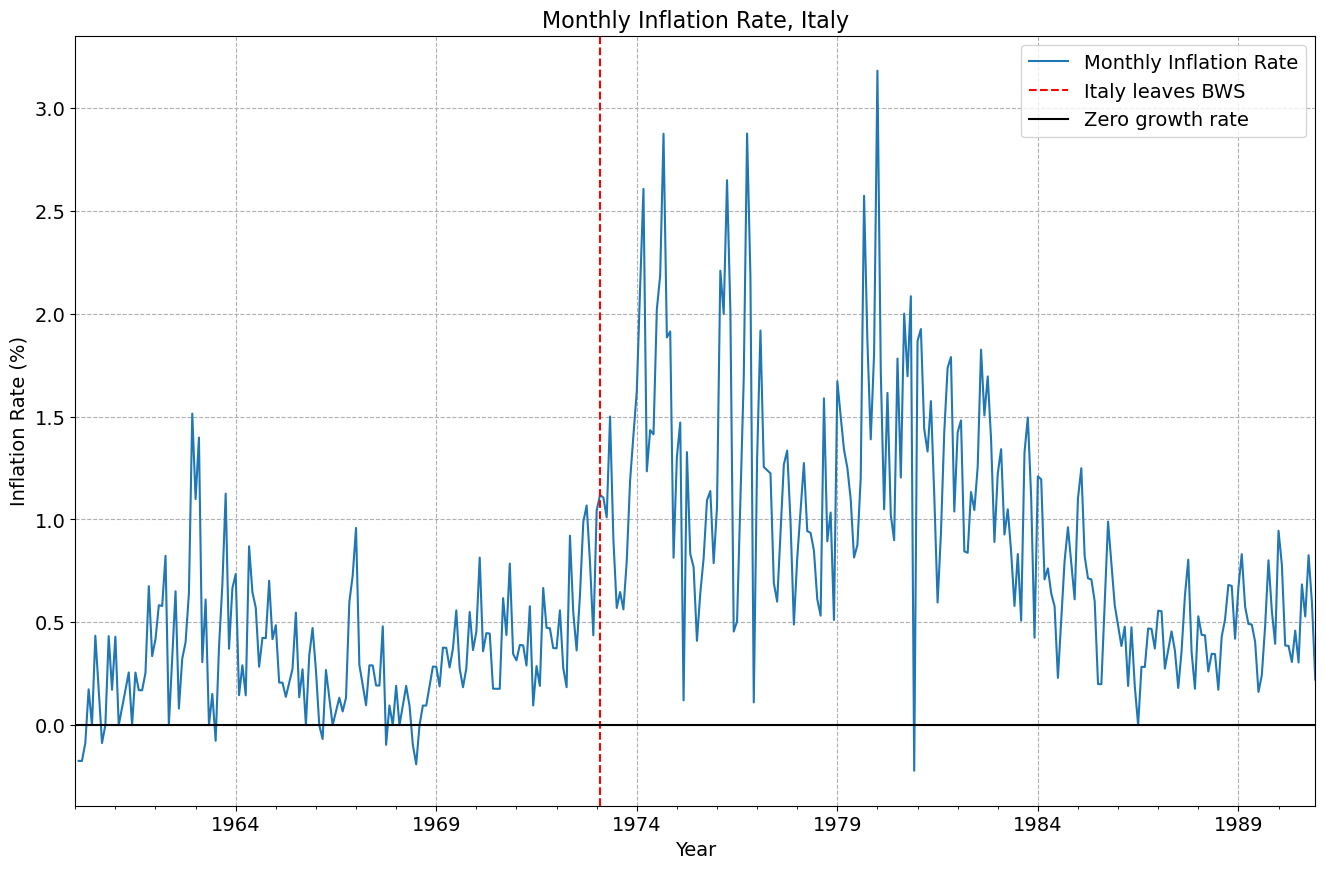

In [71]:
# Plot a time series graph of monthly inflation
combined_df.plot(x='date', y='inflation_rate_italy', figsize=(16, 10), label='Monthly Inflation Rate')
plt.title('Monthly Inflation Rate, Italy', fontsize=16)
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Inflation Rate (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=pd.to_datetime('1973-02-13'), color='r', linestyle='--', label='Italy leaves BWS') # draw vertical line at the end of the Bretton Woods System
plt.axhline(y=0, color='black', linestyle='-', label='Zero growth rate')
plt.legend(fontsize=14)
plt.gcf().set_size_inches(16, 10)

plt.savefig('./images/monthly_inflation_rate.png')
plt.show()

Plot a time series graph of the monthly growth in industrial production.

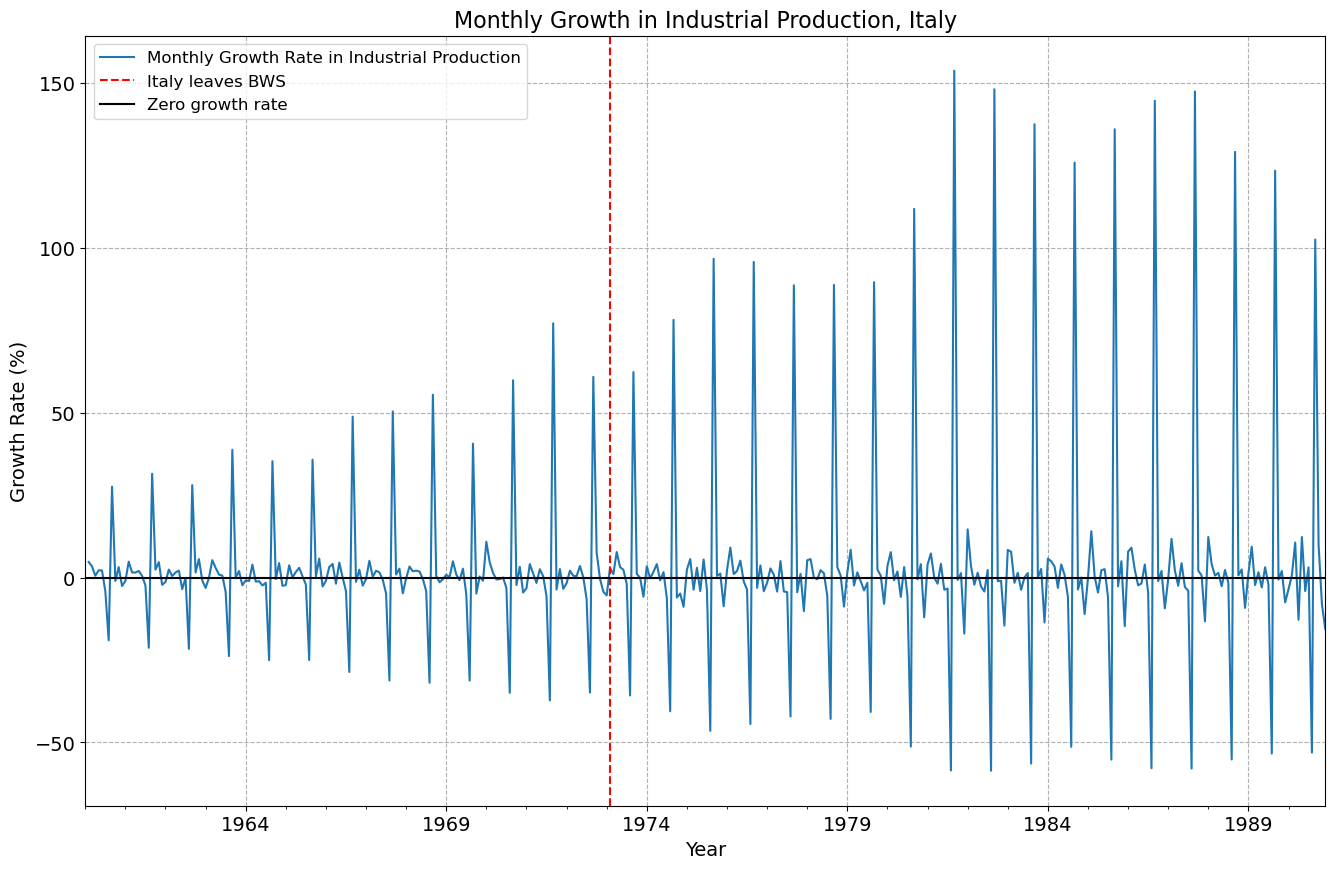

In [72]:
# Plot a time series graph of the monthly growth in industrial production
combined_df.plot(x='date', y='industrial_production_1m_growth_rate', figsize=(16, 10), label= 'Monthly Growth Rate in Industrial Production')
plt.title('Monthly Growth in Industrial Production, Italy', fontsize=16)
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=pd.to_datetime('1973-02-13'), color='r', linestyle='--', label='Italy leaves BWS') # draw vertical line at the end of the Bretton Woods System
plt.axhline(y=0, color='black', linestyle='-', label='Zero growth rate') # draw horizontal line at 0
plt.legend(fontsize=12)
plt.savefig('./images/monthly_growth_industrial_production.png')
plt.show()

Plot a time series graph of the growth in industrial production versus 12 months ago

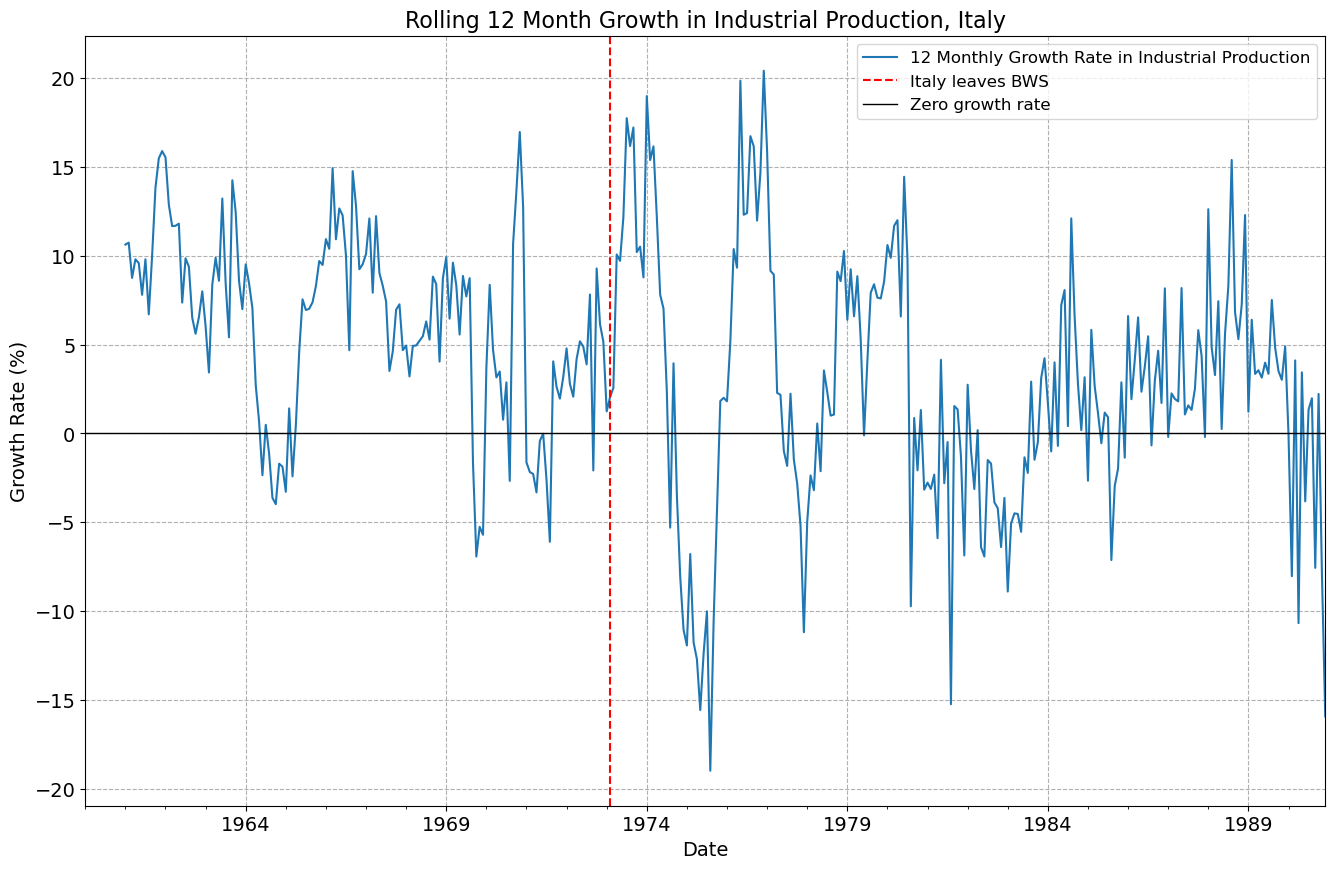

In [73]:
# Plot a time series graph of the growth in industrial production versus 12 months ago
combined_df.plot(x='date', y='industrial_production_12m_growth_rate', figsize=(16, 10), label= '12 Monthly Growth Rate in Industrial Production')
plt.title('Rolling 12 Month Growth in Industrial Production, Italy', fontsize=16)
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=pd.to_datetime('1973-02-13'), color='r', linestyle='--', label='Italy leaves BWS') # draw vertical line at the end of the Bretton Woods System
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, label='Zero growth rate')
plt.legend(fontsize=12)
plt.savefig('./images/rolling_12_month_growth_industrial_production_12m.png')
plt.show()